In [3]:
import os
import sklearn
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

tf.random.set_seed(42)

data = '211027_70ms_3ea_Data_2kPa'
dataname = data
filename = 'D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v3/myData/'+data+'.csv'
SD = pd.read_csv(filename)
SD=SD.iloc[:,:28]
SensorData = SD

In [4]:
SD

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,...,Sx12,Sx13,Sx14,Sx15,Sx16,Sx17,r,theta,theta_enc,z
0,68.91,54.29,51.28,59.52,60.97,56.95,29.25,57.26,56.11,60.69,...,65.39,51.6,81.36,56.27,54.48,71.20,0.9,0,0.00,10
1,70.07,55.81,53.06,58.63,60.97,56.95,32.10,58.16,60.66,60.69,...,64.48,51.6,79.64,58.09,53.46,72.98,0.9,0,0.00,10
2,68.91,54.29,53.95,57.74,62.85,58.69,34.00,55.46,59.75,62.51,...,66.30,52.6,82.22,55.36,53.46,73.87,0.9,0,0.00,10
3,67.75,57.33,53.95,58.63,61.91,56.95,36.85,56.36,60.66,59.78,...,65.39,50.6,80.50,54.45,54.48,71.20,0.9,0,0.00,10
4,66.59,55.81,53.95,60.41,60.97,56.95,31.15,58.16,62.48,60.69,...,65.39,48.6,83.08,56.27,56.52,72.98,0.9,0,0.00,10
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69119,67.75,52.01,55.73,61.30,59.09,58.69,34.00,53.66,59.75,58.87,...,64.48,48.6,79.64,58.09,54.48,72.98,1.8,350,353.32,150
69120,71.23,52.77,54.84,60.41,60.97,60.43,34.00,56.36,58.84,57.96,...,68.12,51.6,82.22,56.27,54.48,74.76,1.8,350,353.32,150
69121,67.75,55.05,56.62,62.19,59.09,57.82,34.00,55.46,58.84,59.78,...,67.21,49.6,81.36,58.09,52.44,74.76,1.8,350,353.32,150
69122,68.91,55.05,55.73,62.19,61.91,59.56,38.75,53.66,57.02,59.78,...,68.12,53.6,83.08,56.27,54.48,72.09,1.8,350,353.32,150


In [5]:
SD.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,...,Sx12,Sx13,Sx14,Sx15,Sx16,Sx17,r,theta,theta_enc,z
count,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000,...,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000
mean,68.952256,55.253842,54.338593,60.055025,60.986536,58.667509,32.886233,56.406169,59.980357,58.792973,...,64.993425,50.561461,80.243645,56.963493,53.357475,72.220209,1.349987,174.984810,180.484513,79.994213
std,2.327842,1.814126,1.973454,2.054898,2.267242,1.849547,2.817320,2.074663,2.013740,2.223902,...,2.035408,2.523083,2.135995,2.107115,2.572106,2.178662,0.335413,103.889221,102.856105,43.206846
min,48.030000,39.090000,34.370000,42.610000,42.170000,42.160000,13.100000,40.160000,40.640000,38.850000,...,49.010000,28.600000,59.860000,38.070000,31.020000,52.510000,0.900000,0.000000,0.000000,10.000000
25%,67.750000,54.290000,53.060000,59.520000,60.030000,57.820000,31.150000,55.460000,58.840000,57.960000,...,64.480000,49.600000,79.640000,56.270000,52.440000,71.200000,0.900000,80.000000,92.070000,40.000000
50%,68.910000,55.050000,54.840000,60.410000,60.970000,58.690000,33.050000,56.360000,59.750000,58.870000,...,65.390000,50.600000,80.500000,57.180000,53.460000,72.090000,1.200000,170.000000,181.890000,80.000000
75%,70.070000,56.570000,55.730000,61.300000,61.910000,59.560000,34.950000,58.160000,61.570000,59.780000,...,66.300000,51.600000,81.360000,58.090000,54.480000,73.870000,1.500000,260.000000,267.980000,120.000000
max,75.870000,61.130000,60.180000,66.640000,68.490000,64.780000,43.500000,63.560000,66.120000,65.240000,...,71.760000,58.600000,86.520000,63.550000,60.600000,78.320000,1.800000,350.000000,359.340000,150.000000


In [6]:
import numpy as np
toRad = np.pi/180 
SD['cos']=np.cos(SD.theta_enc*toRad)
SD['sin']=np.sin(SD.theta_enc*toRad)

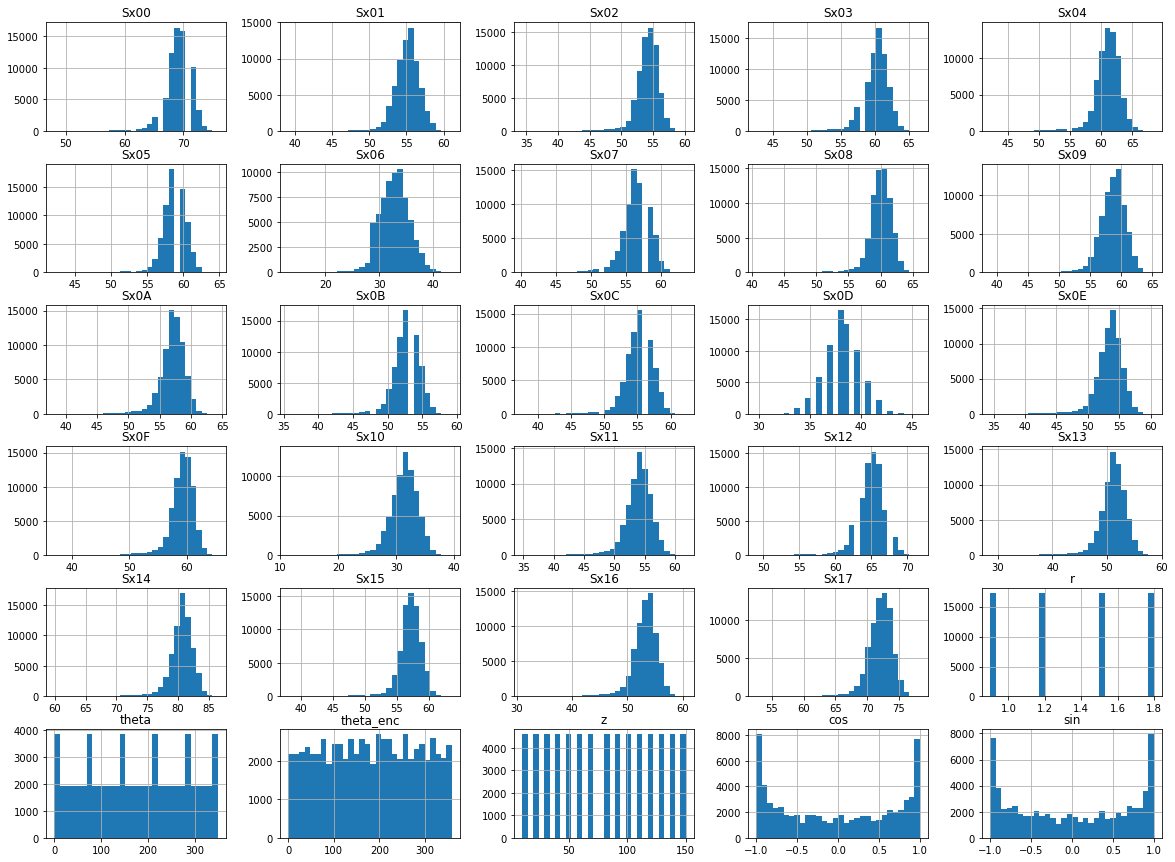

In [7]:
%matplotlib inline
import matplotlib.pyplot as plt
SD.hist(bins=30, figsize=(20,15))
plt.savefig('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v3/savefig/211027_hist.png')
plt.show()

In [8]:
for i in range(0,10):
    plt.figure(figsize = (10,10))
    for j in range(0,24)
        Sxarray[j]="Sx_{0}".format
    #Sxarray=["Sx00","Sx01","Sx02","Sx03","Sx04","Sx05","Sx06","Sx07","Sx08","Sx09"]
    Sxrange=[[50,70],[40,55],[40,55],[40,60],[45,60],[40,55],[15,35],[40,60],[40,60],[40,60]]
    spider_theta = SD["theta_enc"]*toRad
    spider_r = SD[Sxarray[i]]
    ax = plt.subplot(polar=True)
    c = ax.scatter(spider_theta, spider_r, alpha=0.1)
    ax.set_rmin(Sxrange[i][0]-10)
    ax.set_rmax(Sxrange[i][1])    
    plt.title(Sxarray[i])
    #plt.savefig('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v3/savefig/210930_70ms_Mean3ea_hist_spider_{0}.png'.format(Sxarray[i]))
    #plt.show()

SyntaxError: invalid syntax (<ipython-input-8-2380ac56fcab>, line 3)

In [ ]:
SensorData_extractZr.plot(kind="scatter", x= "theta_enc",y= "Sx00",alpha = 0.1)

In [ ]:
for i in range(0,10):
    Sxarray=["Sx00","Sx01","Sx02","Sx03","Sx04","Sx05","Sx06","Sx07","Sx08","Sx09"]
    SensorData_extractZr.plot(kind="scatter", x= "r",y= Sxarray[i],alpha = 0.1)
    plt.savefig('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/savefig/210805_70ms_Mean3ea_hist_scatter_r_{0}.png'.format(Sxarray[i]))

In [ ]:
sensor.plot(kind="scatter", x= "Sx00",y= "z",alpha = 0.1)
sensor.plot(kind="scatter", x= "Sx01",y= "z",alpha = 0.1)
sensor.plot(kind="scatter", x= "Sx02",y= "z",alpha = 0.1)
sensor.plot(kind="scatter", x= "Sx03",y= "z",alpha = 0.1)
sensor.plot(kind="scatter", x= "Sx04",y= "z",alpha = 0.1)
sensor.plot(kind="scatter", x= "Sx05",y= "z",alpha = 0.1)
sensor.plot(kind="scatter", x= "Sx06",y= "z",alpha = 0.1)
sensor.plot(kind="scatter", x= "Sx07",y= "z",alpha = 0.1)
sensor.plot(kind="scatter", x= "Sx08",y= "z",alpha = 0.1)
sensor.plot(kind="scatter", x= "Sx09",y= "z",alpha = 0.1)

In [ ]:
corr_matrix = sensor_copy.corr()

In [ ]:
corr_matrix["theta_enc"].sort_values(ascending=False)

In [ ]:
from pandas.plotting import scatter_matrix

attributes = ["r","theta_enc","cos","sin","Sx00","Sx01","Sx02","Sx03","Sx04","Sx05","Sx06","Sx07","Sx08","Sx09"]
scatter_matrix(SensorData_extractZr[attributes],figsize=(40,40))
plt.savefig('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/savefig/210805_70ms_Mean3ea_hist_scatter2.png')

# Data at specific (r,z) value

In [9]:
import os
import sklearn
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

tf.random.set_seed(42)

data = '211027_70ms_3ea_Data_2kPa'
dataname = data
filename = 'D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v3/myData/'+data+'.csv'
SD = pd.read_csv(filename)
SD=SD.iloc[:,:28]
SensorData = SD

In [10]:
#normalize
nSD = SD.iloc[:,:24].copy()
nSD = (nSD-nSD.mean())/nSD.std()*1.5+45
normSD =pd.concat([nSD,SD.iloc[:,24:]],axis=1) # 센서 데이터는 잘라서 정규화 하고 라벨값은 뒤에 따로 붙임
normSD.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,...,Sx12,Sx13,Sx14,Sx15,Sx16,Sx17,r,theta,theta_enc,z
count,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000,...,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000
mean,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,...,45.000000,45.000000,45.000000,45.000000,45.000000,45.000000,1.349987,174.984810,180.484513,79.994213
std,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,...,1.500000,1.500000,1.500000,1.500000,1.500000,1.500000,0.335413,103.889221,102.856105,43.206846
min,31.518249,31.635014,29.822100,32.265772,32.551043,31.612257,34.465396,33.253876,30.593703,31.548659,...,33.220966,31.943674,30.685611,31.550215,31.973239,31.429598,0.900000,0.000000,0.000000,10.000000
25%,44.225298,44.203052,44.028156,44.609451,44.367159,44.312663,44.075593,44.315911,44.150568,44.438168,...,44.621630,44.428401,44.576091,44.506321,44.464947,44.297590,0.900000,80.000000,92.070000,40.000000
50%,44.972772,44.831454,45.381114,45.259119,44.989060,45.018241,45.087193,44.966619,44.828411,45.051954,...,45.292257,45.022912,45.180025,45.154126,45.059791,44.910352,1.200000,170.000000,181.890000,80.000000
75%,45.720245,46.088258,46.057593,45.908786,45.610961,45.723819,46.098792,46.268035,46.184098,45.665740,...,45.962884,45.617423,45.783959,45.801931,45.654634,46.135875,1.500000,260.000000,267.980000,120.000000
max,49.457613,49.858669,49.439987,49.806790,49.964266,49.957287,50.650991,50.172283,49.573314,49.348457,...,49.986648,49.778999,49.407563,49.688763,49.223694,49.199682,1.800000,350.000000,359.340000,150.000000


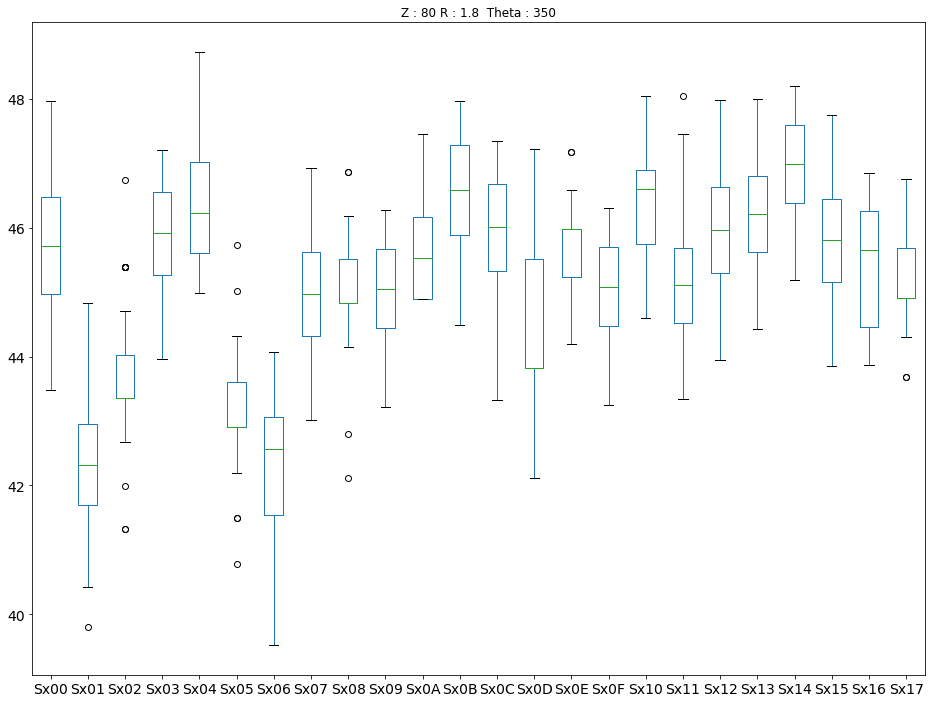

In [11]:
for j in range(0,360,10):
    mask =[0.9,j,80]
    for i in range(0,4):
        SDext = normSD.copy()
        mask[0] = round(0.9 + 0.3 * i,2)
        mask_r = normSD["r"].isin([mask[0]])
        mask_theta = normSD["theta"].isin([mask[1]])
        mask_z = normSD["z"].isin([mask[2]])
        SDext = SDext[mask_r & mask_z&mask_theta].copy()
        SDextCut = SDext.iloc[:,:24]
        %matplotlib inline
        SDextCut.plot(kind = 'box', figsize = (16,12), fontsize =14, title = 'Z : {2} R : {0}  Theta : {1}'.format(mask[0],mask[1],mask[2]))
        plt.savefig('D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v3/savefig/eachData/z{2} theta{1} r{0}.png'.format(round(0.9 + 0.3 * i,2),mask[1],mask[2]))

In [118]:
Sxarray = [" "] * 24
for i in range(0,24):
    Sxarray[i]="Sx%02X" %i

In [41]:
SDext = SD.copy()

In [43]:
SDext.describe()

,Sx00,Sx01,Sx02,Sx03,Sx04,Sx05,Sx06,Sx07,Sx08,Sx09,...,Sx12,Sx13,Sx14,Sx15,Sx16,Sx17,r,theta,theta_enc,z
count,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000,...,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000,69124.000000
mean,67.381027,47.683319,49.071764,52.440480,52.463125,48.317851,26.901181,52.805779,54.218463,53.223061,...,52.265300,51.938160,46.925338,47.357951,46.880394,51.114138,1.349987,174.984810,178.818648,79.994792
std,1.881224,1.630245,1.519006,2.055509,1.862262,1.782972,2.216302,1.896075,1.758640,1.738856,...,1.697408,3.915877,1.989798,1.663704,1.563075,1.630724,0.335413,103.889221,104.334839,43.206478
min,51.510000,37.570000,37.930000,39.940000,43.110000,36.870000,12.150000,39.260000,38.820000,37.940000,...,40.820000,38.600000,29.760000,33.340000,33.270000,40.940000,0.900000,0.000000,0.000000,10.000000
25%,66.590000,46.690000,48.610000,51.510000,51.570000,47.430000,25.450000,51.860000,53.380000,52.500000,...,50.830000,48.600000,46.100000,46.690000,46.400000,49.840000,0.900000,80.000000,87.630000,40.000000
50%,67.750000,47.450000,49.500000,52.400000,52.510000,48.390000,26.400000,52.760000,54.290000,53.410000,...,52.650000,52.600000,46.960000,47.580000,47.410000,50.730000,1.200000,170.000000,177.760000,80.000000
75%,68.910000,48.970000,50.390000,54.180000,53.450000,49.350000,28.300000,53.660000,55.200000,54.320000,...,53.560000,55.600000,47.820000,48.470000,47.410000,52.510000,1.500000,260.000000,268.240000,120.000000
max,74.710000,54.290000,55.730000,59.520000,60.030000,55.110000,36.850000,59.960000,59.750000,59.780000,...,59.020000,62.600000,54.700000,54.700000,52.460000,57.850000,1.800000,350.000000,359.080000,150.000000


# Theta and Theta_enc

In [60]:
import os
import sklearn
import pandas as pd
import tensorflow as tf
from tensorflow.keras import layers
import matplotlib.pyplot as plt

tf.random.set_seed(42)

data = '211027_70ms_3ea_Data_2kPa'
dataname = data
filename = 'D:/ME program/2017-PhD/01_research/02Study/34_ballon_like_cover/DeepLearing/SensorCallbi/LABS_v3/myData/'+data+'.csv'
SD = pd.read_csv(filename)
SD=SD.iloc[:,:28]
SensorData = SD

In [61]:
SDext =SD # SensorData[SensorData['z']==0]
mask = SDext["z"].isin([130])
SD2 = SDext[mask].copy()

<AxesSubplot:xlabel='theta', ylabel='theta_enc'>

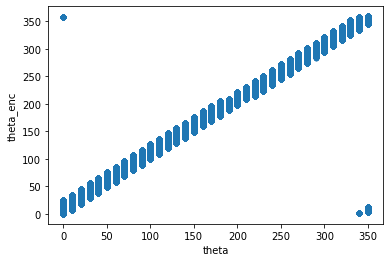

In [63]:
SD.plot(kind="scatter", x= "theta",y= "theta_enc")
